In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('train_titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [10]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [11]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [13]:
x_train.shape, x_test.shape

((712, 2), (179, 2))

In [14]:
x_train.isnull().mean()

Age     0.207865
Fare    0.000000
dtype: float64

In [15]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [16]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)

In [18]:
x_train.sample(5)

,Age,Fare,Age_median,Age_mean,fare_median,fare_mean
369,24.0,69.3000,24.00,24.000000,69.3000,69.3000
517,NaN,24.1500,28.75,29.785904,24.1500,24.1500
867,31.0,50.4958,31.00,31.000000,50.4958,50.4958
35,42.0,52.0000,42.00,42.000000,52.0000,52.0000
389,17.0,12.0000,17.00,17.000000,12.0000,12.0000


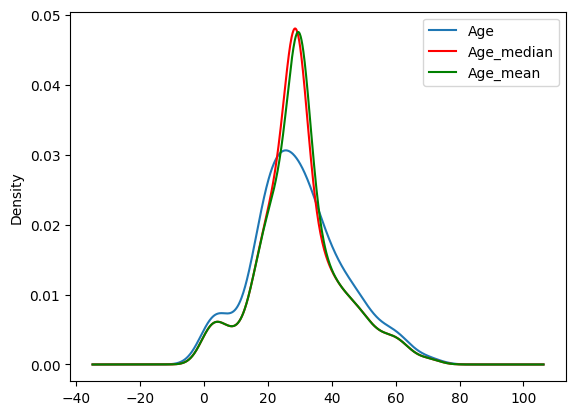

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111)

x_train['Age'].plot(kind='kde', ax = ax)
x_train['Age_median'].plot(kind = 'kde', ax=ax, color='red')
x_train['Age_mean'].plot(kind = 'kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

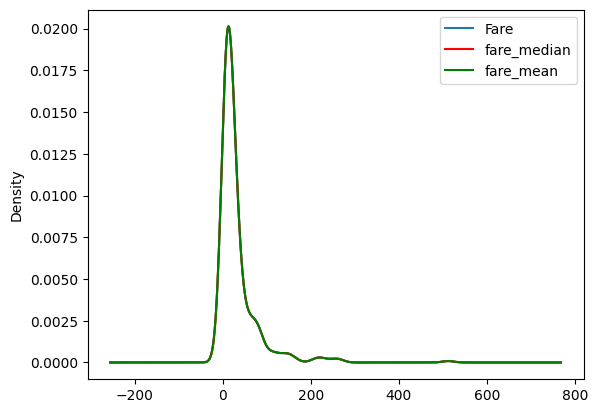

In [24]:
fig = plt.figure()

ax = fig.add_subplot(111)

x_train['Fare'].plot(kind='kde', ax = ax)
x_train['fare_median'].plot(kind = 'kde', ax=ax, color='red')
x_train['fare_mean'].plot(kind = 'kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

In [25]:
x_train.cov()

,Age,Fare,Age_median,Age_mean,fare_median,fare_mean
Age,204.349513,71.512440,204.349513,204.349513,71.512440,71.512440
Fare,71.512440,2368.246832,58.986531,56.626587,2368.246832,2368.246832
Age_median,204.349513,58.986531,161.989566,161.812625,58.986531,58.986531
Age_mean,204.349513,56.626587,161.812625,161.812625,56.626587,56.626587
fare_median,71.512440,2368.246832,58.986531,56.626587,2368.246832,2368.246832
fare_mean,71.512440,2368.246832,58.986531,56.626587,2368.246832,2368.246832


In [26]:
x_train.corr()

,Age,Fare,Age_median,Age_mean,fare_median,fare_mean
Age,1.000000,0.095814,1.000000,1.000000,0.095814,0.095814
Fare,0.095814,1.000000,0.095235,0.091475,1.000000,1.000000
Age_median,1.000000,0.095235,1.000000,0.999454,0.095235,0.095235
Age_mean,1.000000,0.091475,0.999454,1.000000,0.091475,0.091475
fare_median,0.095814,1.000000,0.095235,0.091475,1.000000,1.000000
fare_mean,0.095814,1.000000,0.095235,0.091475,1.000000,1.000000


<Axes: >

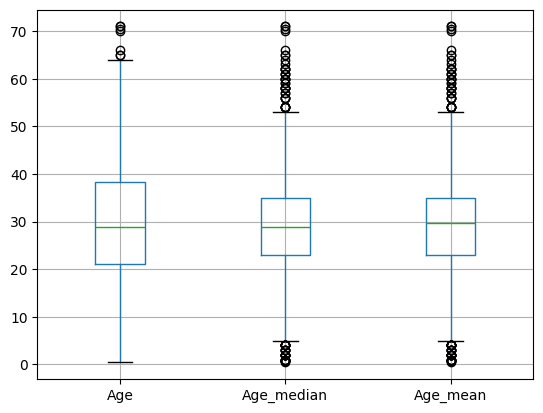

In [28]:
x_train[['Age','Age_median', 'Age_mean' ]].boxplot()

<Axes: >

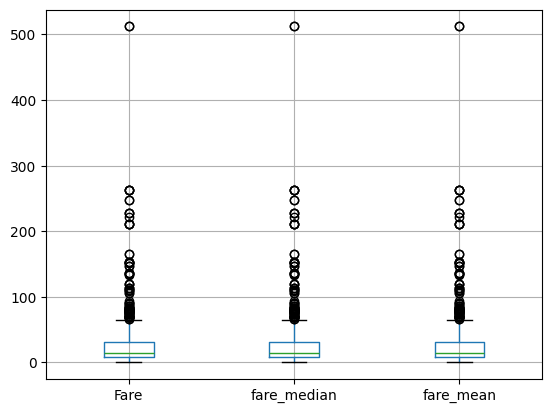

In [30]:
x_train[['Fare','fare_median', 'fare_mean' ]].boxplot()